# Problem_Statement: Analyze the heart disease dataset to explore the machine learning algorithms and build a model to predict the disease.

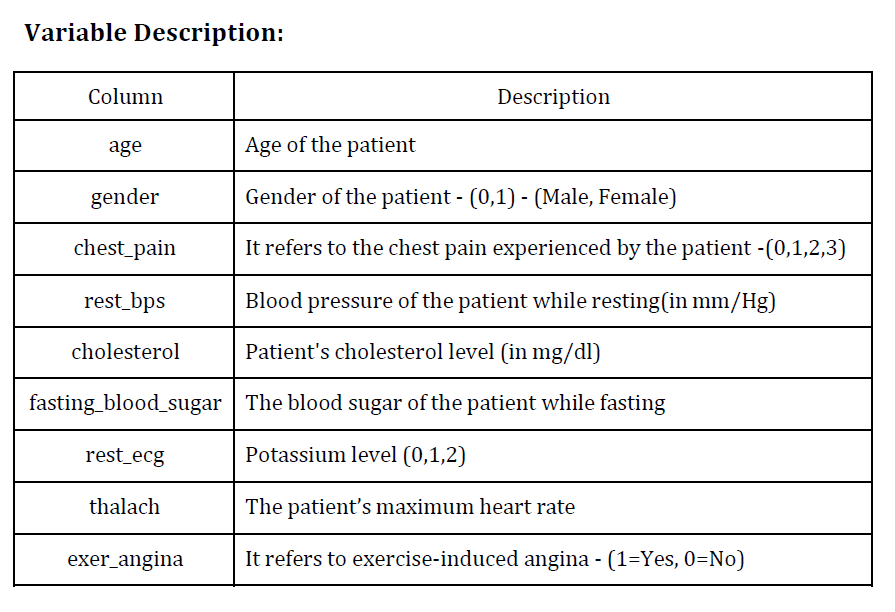

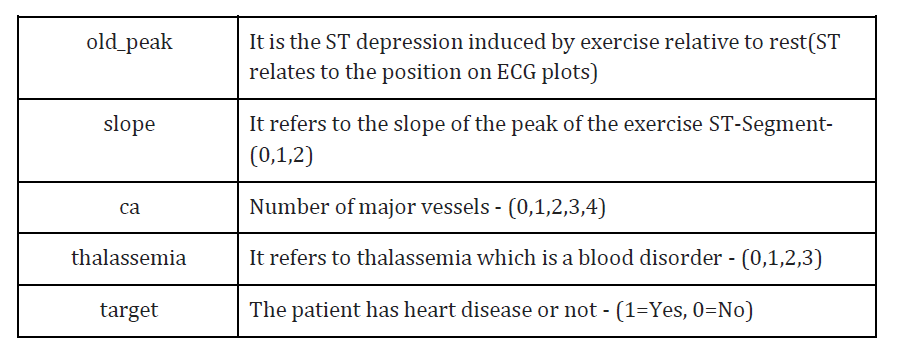

## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

## Importing the dataset

In [2]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="root"
)

print(mydb)

In [3]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="root",
  database="capstone"
)

In [4]:
mycursor = mydb.cursor()

In [5]:
mycursor = mydb.cursor()

mycursor.execute("SELECT * FROM heartdisease")

myresult = mycursor.fetchall()

for x in myresult:
    print(x)

(63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1, 1)
(37, 1, 2, 130, 250, 0, 1, 187, 0, 3.5, 0, 0, 2, 1)
(41, 0, 1, 130, 204, 0, 0, 172, 0, 1.4, 2, 0, 2, 1)
(56, 1, 1, 120, 236, 0, 1, 178, 0, 0.8, 2, 0, 2, 1)
(57, 0, 0, 120, 354, 0, 1, 163, 1, 0.6, 2, 0, 2, 1)
(57, 1, 0, 140, 192, 0, 1, 148, 0, 0.4, 1, 0, 1, 1)
(56, 0, 1, 140, 294, 0, 0, 153, 0, 1.3, 1, 0, 2, 1)
(44, 1, 1, 120, 263, 0, 1, 173, 0, 0.0, 2, 0, 3, 1)
(52, 1, 2, 172, 199, 1, 1, 162, 0, 0.5, 2, 0, 3, 1)
(57, 1, 2, 150, 168, 0, 1, 174, 0, 1.6, 2, 0, 2, 1)
(54, 1, 0, 140, 239, 0, 1, 160, 0, 1.2, 2, 0, 2, 1)
(48, 0, 2, 130, 275, 0, 1, 139, 0, 0.2, 2, 0, 2, 1)
(49, 1, 1, 130, 266, 0, 1, 171, 0, 0.6, 2, 0, 2, 1)
(64, 1, 3, 110, 211, 0, 0, 144, 1, 1.8, 1, 0, 2, 1)
(58, 0, 3, 150, 283, 1, 0, 162, 0, 1.0, 2, 0, 2, 1)
(50, 0, 2, 120, 219, 0, 1, 158, 0, 1.6, 1, 0, 2, 1)
(58, 0, 2, 120, 340, 0, 1, 172, 0, 0.0, 2, 0, 2, 1)
(66, 0, 3, 150, 226, 0, 1, 114, 0, 2.6, 0, 0, 2, 1)
(43, 1, 0, 150, 247, 0, 1, 171, 0, 1.5, 2, 0, 2, 1)
(69, 0, 3, 1

In [6]:
df=pd.DataFrame(myresult)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
df.rename(columns={0: 'age', 1: 'gender',2:'chest_pain',3:'rest_bps',4:'cholestrol',5:'fasting_blood_sugar',6:'rest_ecg',7:'thalach',8:'exer_angina',9:'old_peak',10:'slope',11:'ca',12:'thalassemia',13:'target'}, inplace=True)


In [8]:
df.shape

(303, 14)

In [9]:
df.dtypes

age                      int64
gender                   int64
chest_pain               int64
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar      int64
rest_ecg                 int64
thalach                  int64
exer_angina              int64
old_peak               float64
slope                    int64
ca                       int64
thalassemia              int64
target                   int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

## There are no null values in the dataset

## Checking the statistical features of the Dataset

In [12]:
df.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Plotting the graph for the Dataset

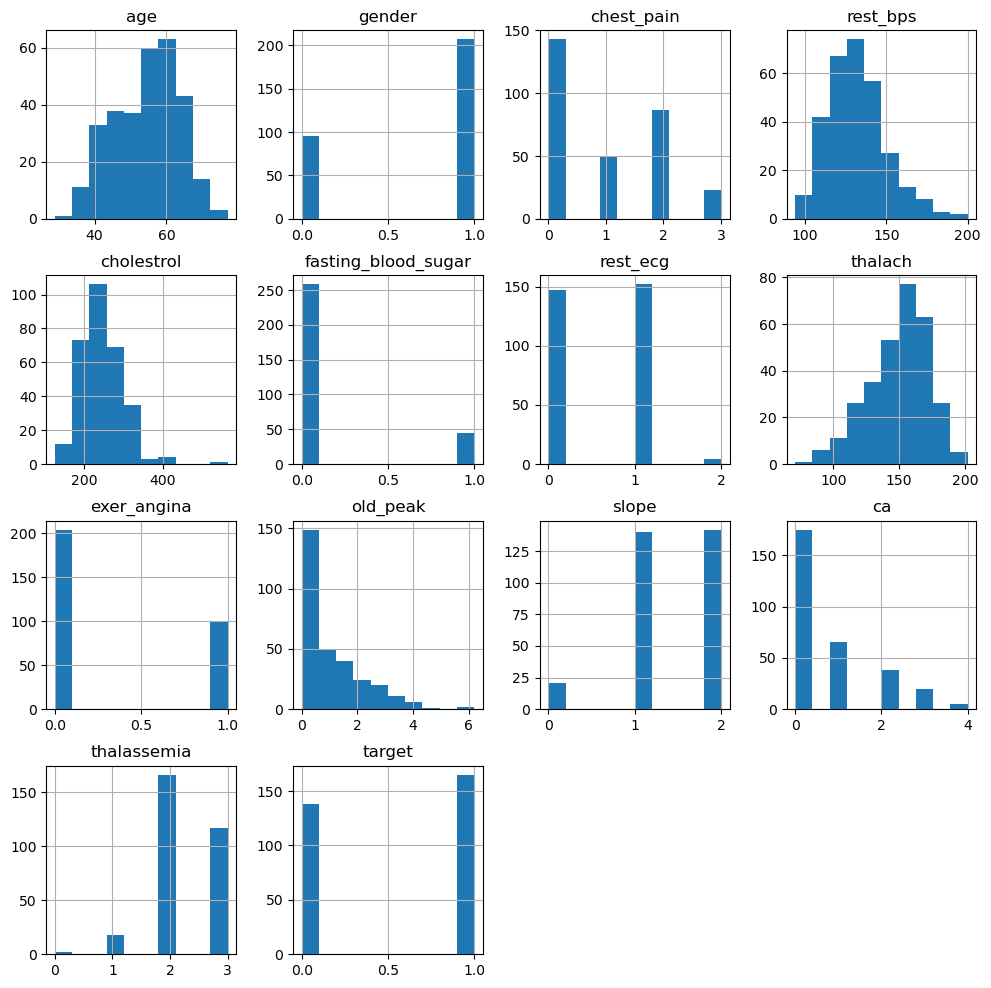

In [13]:
df.hist(figsize=(12,12))
plt.show()

### Finding correlation between the features of the Dataset

In [14]:
df.corr()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
gender,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
rest_bps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholestrol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exer_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
old_peak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


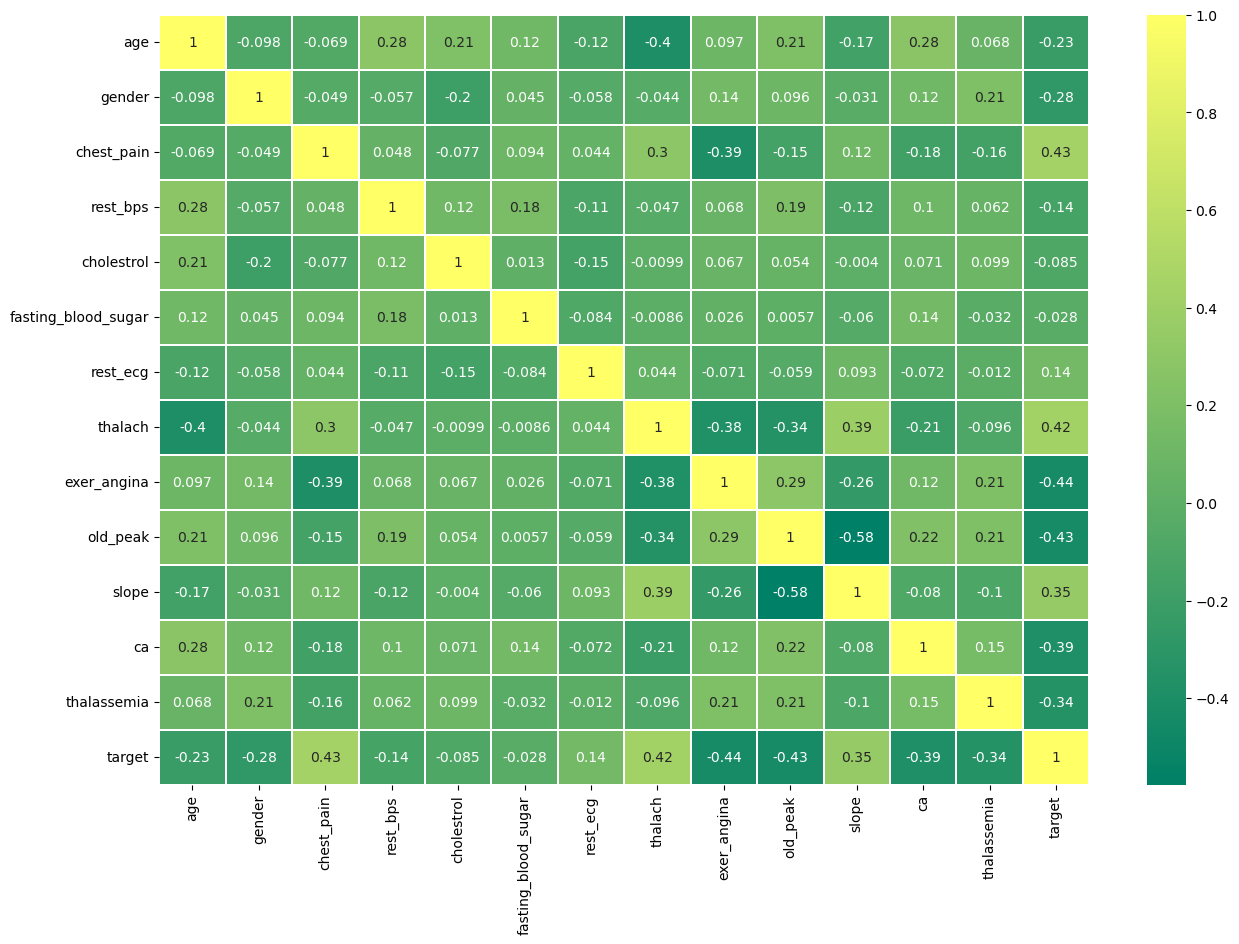

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidth=.01,annot=True,cmap="summer",cbar="True")
plt.show()

#### we can understand that Chest pain(cp) and target have a positive correlation. It means that whose has a large risk of chest pain results in a greater chance to have heart disease. In addition to chest pain, thalach, slope, and resting have a positive correlation with the target.

###  Selecting important features based on Random Forest

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop(['target'], axis=1)
y = df['target']

trainx, testx, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)


In [18]:
rfc.fit(trainx, trainy)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)

In [19]:
feat_labels = X.columns.values

feature_importance = []
for feature in zip(feat_labels, rfc.feature_importances_):
   
    feature_importance.append(feature)

In [20]:
feature_importance

[('age', 0.08637497645434089),
 ('gender', 0.04521192290338793),
 ('chest_pain', 0.12564302828196935),
 ('rest_bps', 0.07527209382229948),
 ('cholestrol', 0.07766875224525573),
 ('fasting_blood_sugar', 0.00932295560438782),
 ('rest_ecg', 0.020257131448404266),
 ('thalach', 0.1181842514942303),
 ('exer_angina', 0.05955722667949028),
 ('old_peak', 0.11067998177221852),
 ('slope', 0.03812361553497829),
 ('ca', 0.13502042748363943),
 ('thalassemia', 0.09868363627539757)]

In [21]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(rfc, threshold=0.01)

# Train the selector
sfm.fit(trainx, trainy)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=1000, n_jobs=-1,
                                                 random_state=0),
                threshold=0.01)

In [22]:
selected_features = []
for feature_list_index in sfm.get_support(indices=True):
    selected_features.append(feat_labels[feature_list_index])

In [23]:
selected_features

['age',
 'gender',
 'chest_pain',
 'rest_bps',
 'cholestrol',
 'rest_ecg',
 'thalach',
 'exer_angina',
 'old_peak',
 'slope',
 'ca',
 'thalassemia']

In [24]:
df = df[selected_features]
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia
0,63,1,3,145,233,0,150,0,2.3,0,0,1
1,37,1,2,130,250,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,172,0,1.4,2,0,2
3,56,1,1,120,236,1,178,0,0.8,2,0,2
4,57,0,0,120,354,1,163,1,0.6,2,0,2


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    int64  
 1   gender       303 non-null    int64  
 2   chest_pain   303 non-null    int64  
 3   rest_bps     303 non-null    int64  
 4   cholestrol   303 non-null    int64  
 5   rest_ecg     303 non-null    int64  
 6   thalach      303 non-null    int64  
 7   exer_angina  303 non-null    int64  
 8   old_peak     303 non-null    float64
 9   slope        303 non-null    int64  
 10  ca           303 non-null    int64  
 11  thalassemia  303 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 28.5 KB


Number of patients having Heart disease :  165
Number of patients not having Heart disease  :  138


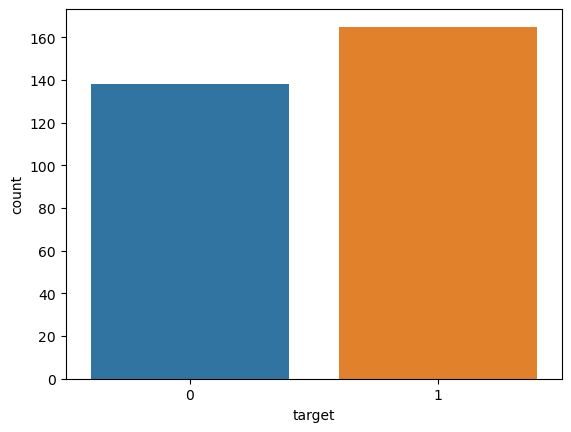

In [26]:
ax = sns.countplot(x=y)     
S, N = y.value_counts()
print('Number of patients having Heart disease : ',S)
print('Number of patients not having Heart disease  : ',N)

### Visualizing the Dataset based on age bins

In [27]:
# dividing the age into bins
df['age_by_decade'] = pd.cut(x=df['age'], bins=[29,39,49, 59, 69, 79])
df

,age,gender,chest_pain,rest_bps,cholestrol,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,age_by_decade
0,63,1,3,145,233,0,150,0,2.3,0,0,1,"(59, 69]"
1,37,1,2,130,250,1,187,0,3.5,0,0,2,"(29, 39]"
2,41,0,1,130,204,0,172,0,1.4,2,0,2,"(39, 49]"
3,56,1,1,120,236,1,178,0,0.8,2,0,2,"(49, 59]"
4,57,0,0,120,354,1,163,1,0.6,2,0,2,"(49, 59]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,1,123,1,0.2,1,0,3,"(49, 59]"
299,45,1,3,110,264,1,132,0,1.2,1,0,3,"(39, 49]"
300,68,1,0,144,193,1,141,0,3.4,1,2,3,"(59, 69]"
301,57,1,0,130,131,1,115,1,1.2,1,1,3,"(49, 59]"


In [28]:
cat_colms=["gender","chest_pain","rest_ecg","exer_angina","slope","ca","thalassemia"]

#### in the dataset, most patients are female and belong to the age-group of 49-69
#### female patients between 49-69 have higher thalassemia

### Implementing models

#### Logistic Regression

In [29]:
X = df.drop(['age_by_decade'], axis=1)
y = y

trainx, testx, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=0)

In [30]:
lr=LogisticRegression()

In [31]:
model1=lr.fit(trainx,trainy)

In [32]:
prediction1=model1.predict(testx)

In [33]:
cm=confusion_matrix(testy,prediction1)
cm

array([[47, 22],
       [ 8, 75]], dtype=int64)

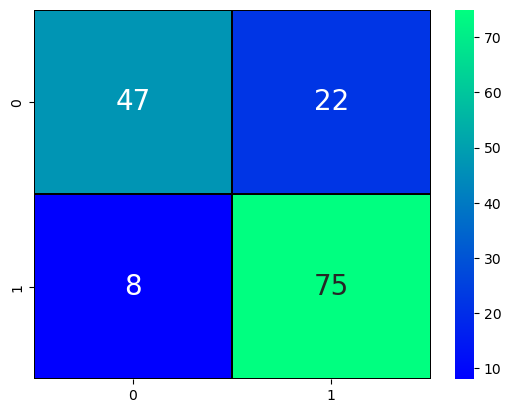

In [34]:
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

In [35]:
print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
A1=(TP+TN)/(TP+TN+FN+FP)
print('Testing Recall for Logistic Regression:',(TP/(TP+FN)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))
print("F1 score fr Logistic Regression:", (2*((TP/(TP+FP))*(TP/(TP+FN))))/((TP/(TP+FP)+(TP/(TP+FN)))))

Testing Accuracy for Logistic Regression: 0.8026315789473685
Testing Recall for Logistic Regression: 0.8545454545454545
Testing Precision for Logistic Regression: 0.6811594202898551
F1 score fr Logistic Regression: 0.7580645161290324


In [36]:
from sklearn.metrics import classification_report
print(classification_report(testy, prediction1))

              precision    recall  f1-score   support

           0       0.85      0.68      0.76        69
           1       0.77      0.90      0.83        83

    accuracy                           0.80       152
   macro avg       0.81      0.79      0.80       152
weighted avg       0.81      0.80      0.80       152



### Decision Tree

In [37]:
tree_ = DecisionTreeClassifier(max_depth=5,criterion='entropy')

In [38]:
cv_scores = cross_val_score(tree_, X, y, cv=10, scoring='accuracy')

In [39]:
m=tree_.fit(X, y)

In [40]:
prediction=m.predict(testx)

In [41]:
cm= confusion_matrix(testy,prediction)

              precision    recall  f1-score   support

           0       0.94      0.86      0.89        69
           1       0.89      0.95      0.92        83

    accuracy                           0.91       152
   macro avg       0.91      0.90      0.91       152
weighted avg       0.91      0.91      0.91       152



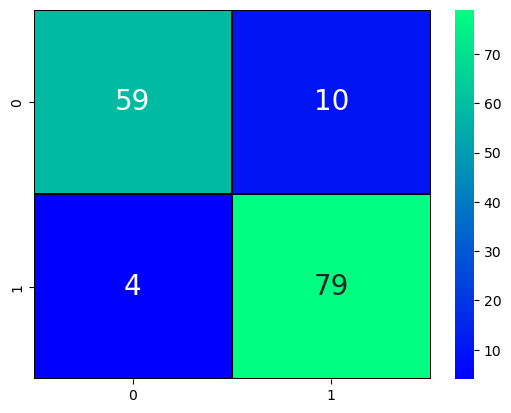

In [42]:
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(testy, prediction))

In [43]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Recall for Decision Tree:',(TP/(TP+FN)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))
print("F1 score for Decision Tree:", (2*((TP/(TP+FP))*(TP/(TP+FN))))/((TP/(TP+FP)+(TP/(TP+FN)))))

Testing Accuracy for Decision Tree: 0.9078947368421053
Testing Recall for Decision Tree: 0.9365079365079365
Testing Precision for Decision Tree: 0.855072463768116
F1 score for Decision Tree: 0.8939393939393939


In [44]:
A2=(TP+TN)/(TP+TN+FN+FP)

### Random Forest Classifier

In [45]:
rfc=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)

In [46]:
model3 = rfc.fit(trainx, trainy)

In [47]:
prediction3 = model3.predict(testx)

Testing Accuracy for Random Forest: 0.8157894736842105
Testing Recall for Random Forest: 0.8727272727272727
Testing Precision for Random Forest: 0.6956521739130435
F1 score for Random Forest: 0.7741935483870968


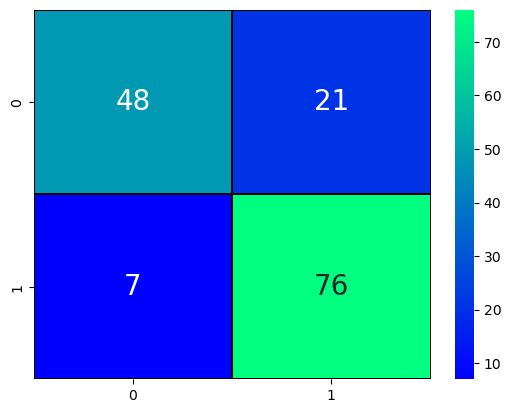

In [48]:
cm3=confusion_matrix(testy, prediction3)
sns.heatmap(cm3, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
A3=(TP+TN)/(TP+TN+FN+FP)
print('Testing Recall for Random Forest:',(TP/(TP+FN)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))
print("F1 score for Random Forest:", (2*((TP/(TP+FP))*(TP/(TP+FN))))/((TP/(TP+FP)+(TP/(TP+FN)))))

In [49]:
print(classification_report(testy, prediction3))

              precision    recall  f1-score   support

           0       0.87      0.70      0.77        69
           1       0.78      0.92      0.84        83

    accuracy                           0.82       152
   macro avg       0.83      0.81      0.81       152
weighted avg       0.82      0.82      0.81       152



### SVM

In [50]:
svm=SVC(C=12,kernel='linear')

In [51]:
model4=svm.fit(trainx,trainy)

In [52]:
prediction4=model4.predict(testx)

Testing Accuracy for SVM: 0.8026315789473685
Testing Recall for SVM: 0.8421052631578947
Testing Precision for SVM: 0.6956521739130435
F1 score for SVM: 0.761904761904762


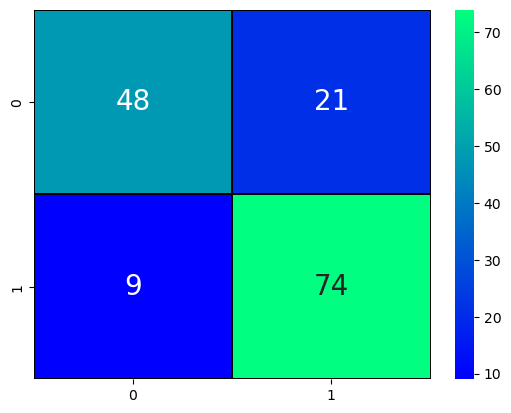

In [53]:
cm4= confusion_matrix(testy,prediction4)
sns.heatmap(cm4, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm4[0][0]
TN=cm4[1][1]
FN=cm4[1][0]
FP=cm4[0][1]
print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))
A4=(TP+TN)/(TP+TN+FN+FP)
print('Testing Recall for SVM:',(TP/(TP+FN)))
print('Testing Precision for SVM:',(TP/(TP+FP)))
print("F1 score for SVM:", (2*((TP/(TP+FP))*(TP/(TP+FN))))/((TP/(TP+FP)+(TP/(TP+FN)))))

In [54]:
a=classification_report(testy, prediction3)

In [55]:
Overall_Accuracy=[]
Overall_Accuracy.append(A1)


In [56]:
Overall_Accuracy.append(A2)

In [57]:
Overall_Accuracy.append(A3)

In [58]:
Overall_Accuracy.append(A4)
Overall_Accuracy

[0.8026315789473685,
 0.9078947368421053,
 0.8157894736842105,
 0.8026315789473685]

In [59]:
Overall_Accuracy=pd.DataFrame(Overall_Accuracy)


In [60]:
new_index_values = ['Logistic Regression', 'Decision Tree', 'Random Forest', "Support Vector Machine"]
Overall_Accuracy = Overall_Accuracy.set_index(pd.Index(new_index_values))

In [61]:
Overall_Accuracy.reset_index(inplace=True) 
Overall_Accuracy = Overall_Accuracy.rename(columns={"index": "Model"})
Overall_Accuracy = Overall_Accuracy.rename(columns={0: "Accuracy"})
Overall_Accuracy

,Model,Accuracy
0,Logistic Regression,0.802632
1,Decision Tree,0.907895
2,Random Forest,0.815789
3,Support Vector Machine,0.802632


In [63]:
input_sample=(29,0,0,90,90,0,90,0,0,0,0,3)
input_as_numpy=np.asarray(input_sample)
input_reshaped=input_as_numpy.reshape(1,-1)  

In [64]:
for i in Overall_Accuracy:
    best_model = Overall_Accuracy.loc[Overall_Accuracy['Accuracy'].idxmax()]
    if best_model["Model"] == "Logistic Regression":
        prediction = lr.predict(input_reshaped)
    elif best_model["Model"] == "Decision Tree":
        prediction = tree_.predict(input_reshaped)
    elif best_model["Model"] == "Random Forest":
        prediction = rfc.predict(input_reshaped)
    elif best_model["Model"] == "Support Vector Machine":
        prediction = svm.predict(input_reshaped)
    else:
        raise ValueError("Error")

    # Make predictions based on the selected model
if prediction == 1:
    print("The patient seems to have heart disease :(")
else:
    print("The patient seems to be normal :)")
    
    has_executed = True   

The patient seems to be normal :)


 ##   ##
    

In [65]:
import pickle

In [66]:
pickle.dump(tree_, open('model.pkl', 'wb'))
model = pickle.load(open('model.pkl', 'rb'))
print(model)

DecisionTreeClassifier(criterion='entropy', max_depth=5)
